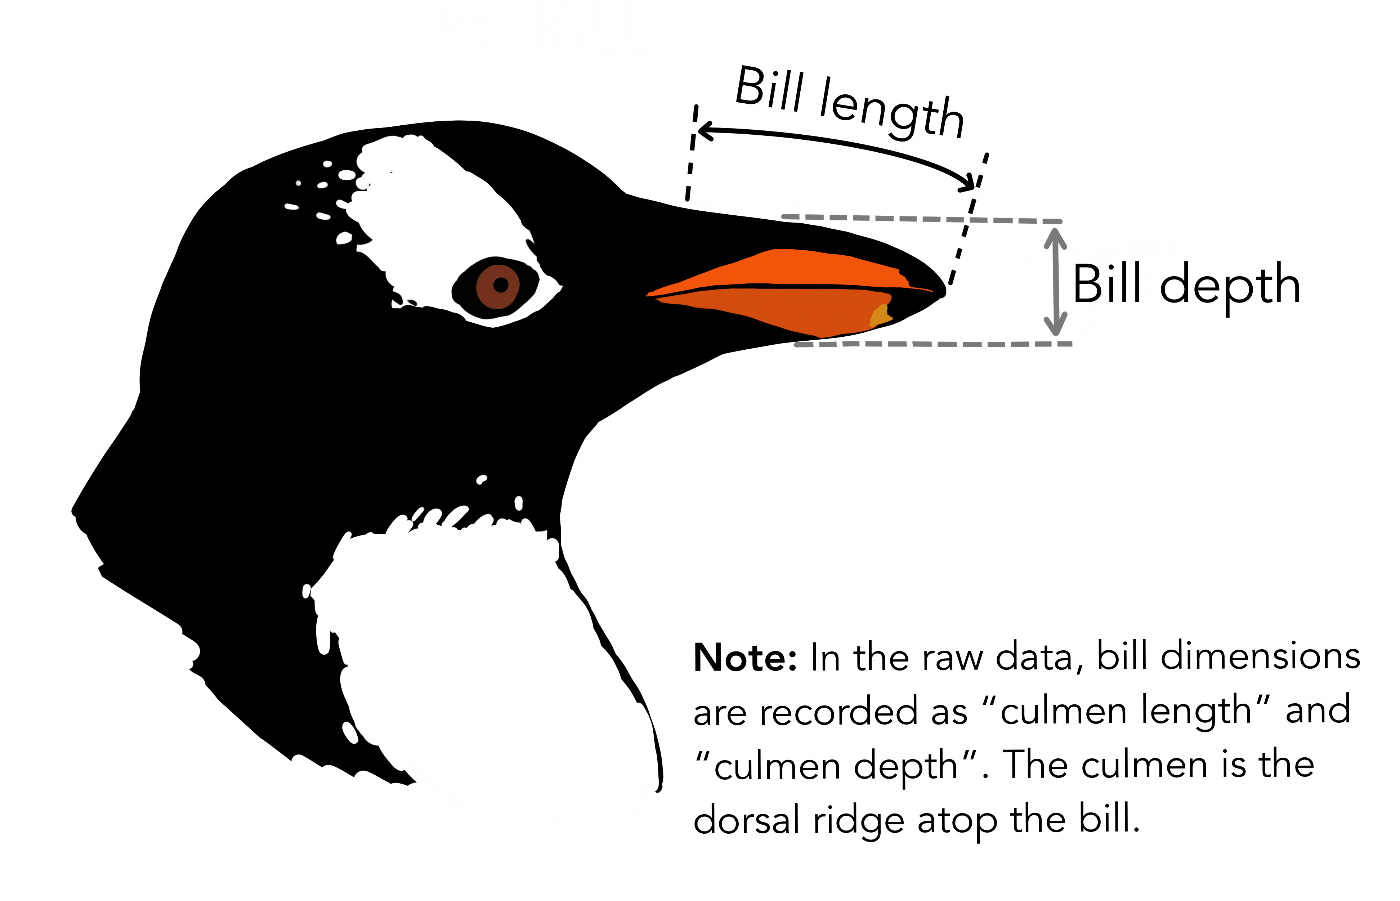

## Penguins

### Descripción del Dataset

El dataset contiene información sobre tres especies de pingüinos que viven en las Islas Palmer, en la Antártida:

- Adelie
- Chinstrap
- Gentoo

### Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

### Análisis

In [2]:
# Cargamos el dataset de pingüinos
penguins = sns.load_dataset('penguins')

In [3]:
# Mostramos las primeras filas del dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
# Vemos la información del dataset
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
# Eliminamos las filas con valores nulos
penguins.dropna(inplace = True)

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


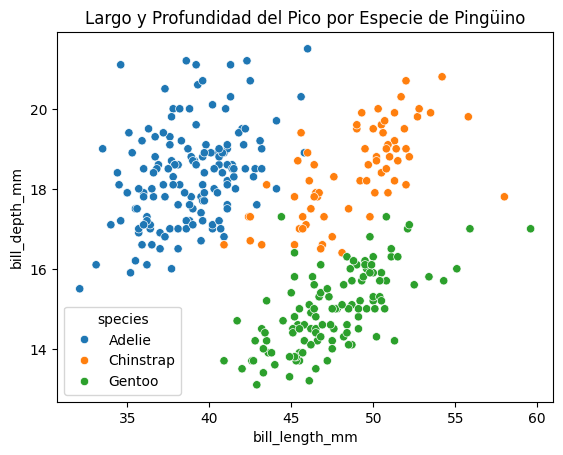

In [8]:
# Creamos un gráfico de dispersión del largo y profundidad del pico por especie
sns.scatterplot(x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species', data = penguins)
plt.title('Largo y Profundidad del Pico por Especie de Pingüino')
plt.show()

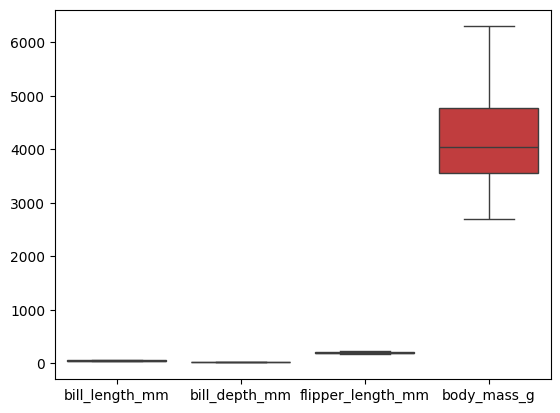

In [9]:
# Grafica para detectar outliers
sns.boxplot(data = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
plt.show()

### Modelo Machine Learning: KNN

KNN es un algoritmo sencillo y fácil de entender, lo cual es ideal si estás comenzando en el mundo de los datos. Una de sus ventajas es que no necesita hacer suposiciones complicadas sobre cómo están distribuidos los datos. Esto significa que puedes usarlo incluso cuando no conoces a fondo la estructura o el patrón de tus datos.

Además, KNN es muy útil cuando tienes que clasificar datos en más de dos categorías. Por ejemplo, en el caso del dataset de pingüinos, donde queremos identificar a qué especie pertenece un pingüino (Adelie, Gentoo o Chinstrap), KNN hace un buen trabajo. Lo que hace es ver qué especies están más cerca del pingüino que queremos clasificar y lo asigna a la especie que sea más común entre sus vecinos más cercanos.

In [10]:
# Convertimos las variables categóricas en variables numéricas
penguins['species'] = penguins['species'].astype('category')
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')

mappings = {
    'species' : dict(enumerate(penguins['species'].cat.categories)),
    'island' : dict(enumerate(penguins['island'].cat.categories)),
    'sex' : dict(enumerate(penguins['sex'].cat.categories))
}

In [11]:
# Convertimos las variables categóricas en variables numéricas
penguins['species'] = penguins['species'].astype('category').cat.codes
penguins['island'] = penguins['island'].astype('category').cat.codes
penguins['sex'] = penguins['sex'].astype('category').cat.codes

In [12]:
# Guardar los mappings
with open('mappings.pkl', 'wb') as f:
    pickle.dump(mappings, f)

In [13]:
# Guardamos el dataset en un archivo CSV
penguins.to_csv('data/penguins.csv', index = False)

In [14]:
# Separamos las características (X) y la variable objetivo (y)
X = penguins.drop(columns = 'species')
y = penguins['species']

In [15]:
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Guardar el escalador
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [17]:
# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [18]:
# Entrenamos el modelo
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# Evaluamos el modelo
y_pred = knn.predict(X_test)

In [20]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9850746268656716

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [21]:
cv_scores = cross_val_score(knn, X_scaled, y, cv = 5)  
print("Precisión promedio en validación cruzada:", cv_scores.mean())
print("Desviación estándar en validación cruzada:", cv_scores.std())

Precisión promedio en validación cruzada: 0.9880144730891001
Desviación estándar en validación cruzada: 0.005993403445853452


Se puede apreciar un buen rendimiento y bajo overfitting.

In [22]:
# Guardamos el modelo
with open('ad_model.pkl', 'wb') as f:
    pickle.dump(knn, f)